# Introduction
![](https://gifdb.com/images/high/tv-character-umaru-doma-anime-snoring-sleeping-61ix6i8x04hqgej0.gif)

## What is Sleep?
Sleep is a period of rest.

## Why is it important?
Sleep isn’t just a time when your brain and body shut down. Getting enough sleep helps you think more clearly and react more quickly. Not getting enough sleep can be dangerous, not only affecting your performance, but your health and mood, too.

## Purpose of Project
This project aims to uncover the causes of insomnia and sleep apnea, providing a clearer insight into what leads to these sleep disorders.

# Data Overview
* **Person ID**: An identifier for each individual.
* **Gender**: The gender of the person (Male/Female).
* **Age**: The age of the person in years.
* **Occupation**: The occupation or profession of the person.
* **Sleep Duration (hours)**: The number of hours the person sleeps per day.
* **Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.
* **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
* **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
* **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* **Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.
* **Daily Steps**: The number of steps the person takes per day.
* **Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column:**
* **None**: The individual does not exhibit any specific sleep disorder.
* **Insomnia**: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
* **Sleep Apnea**: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

# Data Processing

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
305,306,Female,51,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
157,158,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,NaN
275,276,Female,49,Nurse,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
33,34,Male,31,Doctor,6.1,6,30,8,Normal,125/80,72,5000,NaN
233,234,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia


In [3]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
216,217,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,None
334,335,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
182,183,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,None
206,207,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,None
123,124,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Exploratory Data Analysis

In [7]:
# Style
color = sns.color_palette("tab10", 3)
grad = sns.color_palette("rocket", as_cmap=True)

**Sleep Disorder Distribution**

---

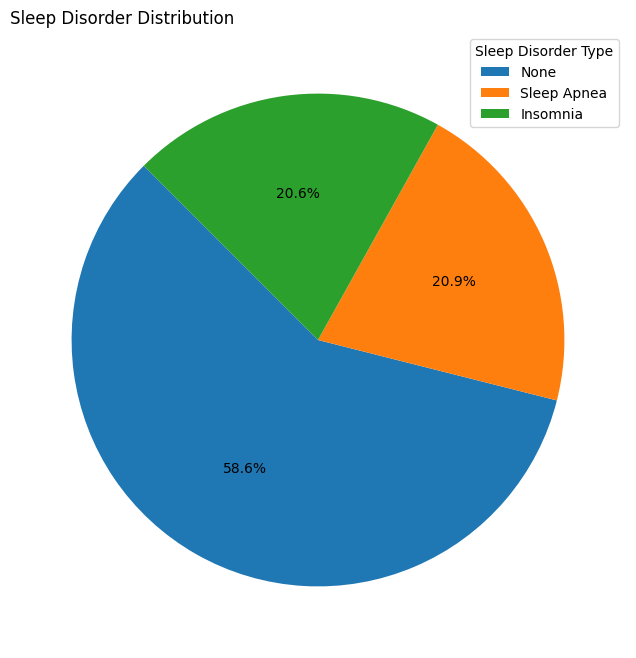

In [8]:
sleep_count = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sleep_count, autopct='%1.1f%%', startangle=135)
plt.title("Sleep Disorder Distribution", loc='left')
plt.legend(labels=sleep_count.index, title="Sleep Disorder Type", loc="upper right")
plt.show()

* More people are have None sleep disorder.

**Sleep Disorder by on Gender**

---

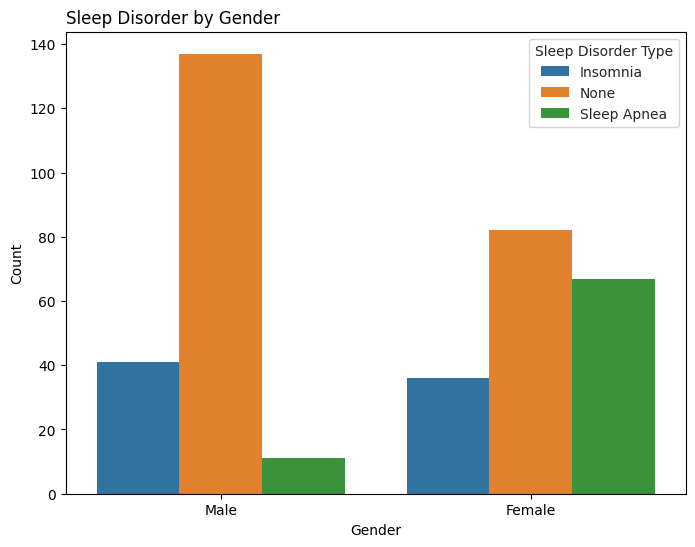

In [9]:
sleep_gender = df.groupby('Sleep Disorder')['Gender'].value_counts()
sleep_gender = sleep_gender.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Gender',
            y = 'count',
            hue = 'Sleep Disorder',
            data = sleep_gender,
            palette = color)
sns.set_style('ticks')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sleep Disorder by Gender', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

* It appears that more Male have **None** sleep disorder.
* **Insomnia** occurs equally in both males and females.
* Female is happen to be have more **Sleep Apnea** than Male.

**Sleep Disorder by on Occupation**

---

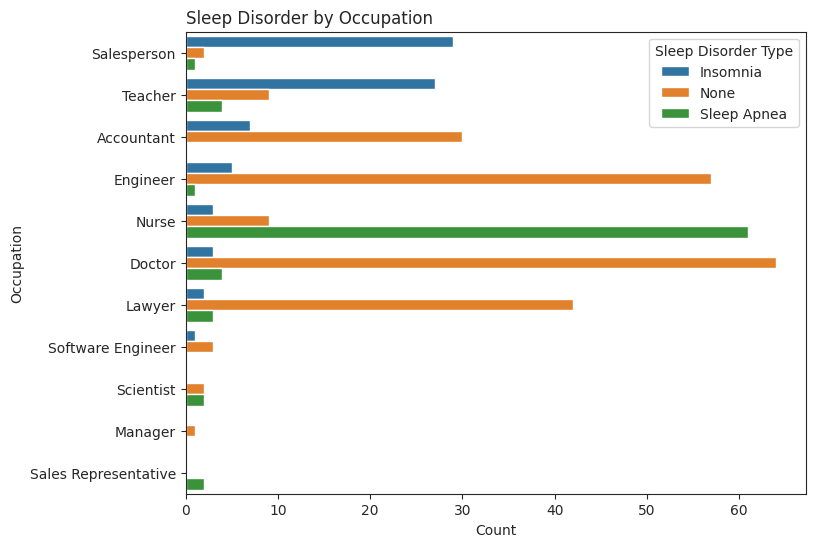

In [10]:
sleep_occupation = df.groupby('Sleep Disorder')['Occupation'].value_counts()
sleep_occupation = sleep_occupation.reset_index()
sleep_occupationt = sleep_occupation.sort_values(by='Occupation', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x = 'count',
            y = 'Occupation',
            hue = 'Sleep Disorder',
            data = sleep_occupation,
            palette = color)

plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Sleep Disorder by Occupation', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

* **Salesperson** happen to be most having **Insomnia,** followed by **Teacher**, and **Accountant.**
* **Nurse** having the **Sleep Apnea** the most than other occupations.
* **Doctor, Engineer, Lawyer** have no sleep disorder.

**Age Distribution by Sleep Disorder**

---

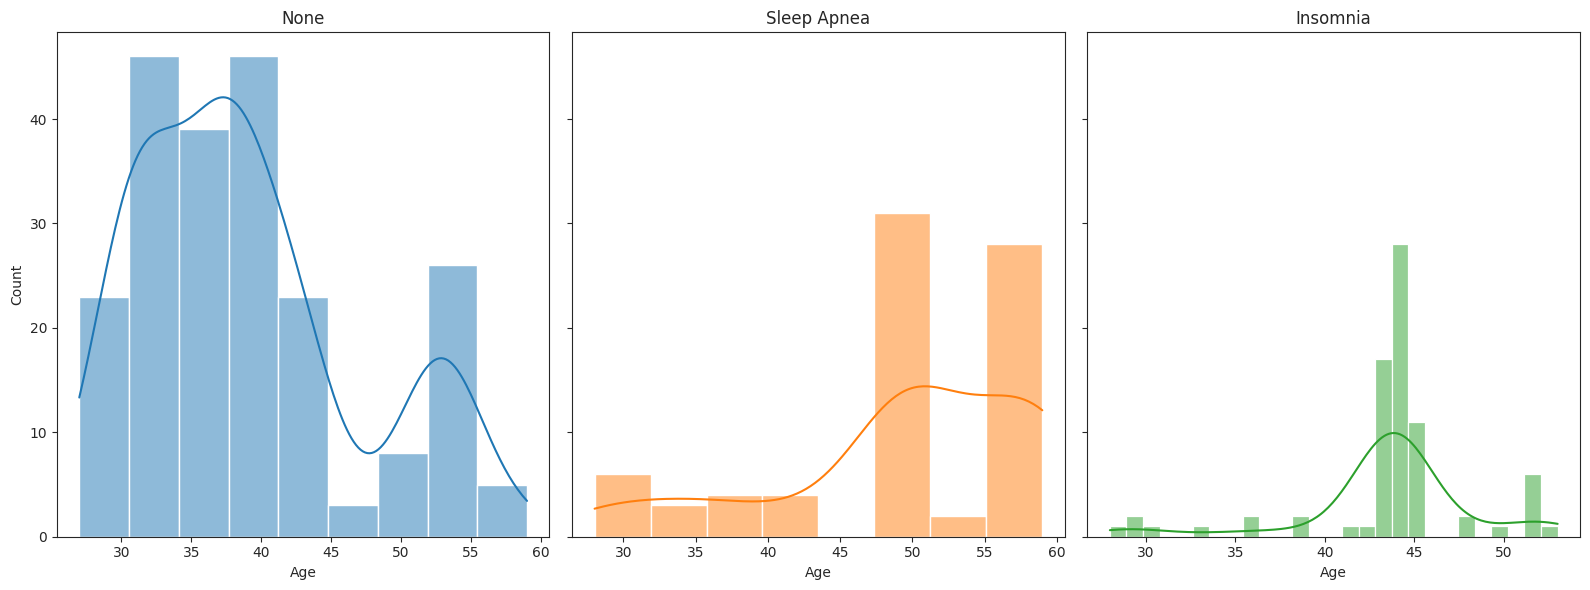

In [11]:
sleep_list = ['None', 'Sleep Apnea', 'Insomnia']

fig, axes = plt.subplots(1, len(sleep_list), figsize=(16, 6), sharey=True)

for i, _ in enumerate(sleep_list):
    ax = axes[i]
    colors = color[i % len(color)]
    sns.histplot(data = df[df['Sleep Disorder'] == _], 
                 x = 'Age', 
                 kde = True, 
                 color = colors, 
                 ax = ax)
    ax.set_title(_)

plt.tight_layout()
plt.show()


* In the age range of **30 to 42**, the **None** sleep disorder.
* **Sleep Apnea** is more prevalent in the age range of **50 to 57.**
* The age range of **43 to 45** sees a higher occurrence of the **Insomnia.**

**Sleep Disorder by Sleep Quality**

---

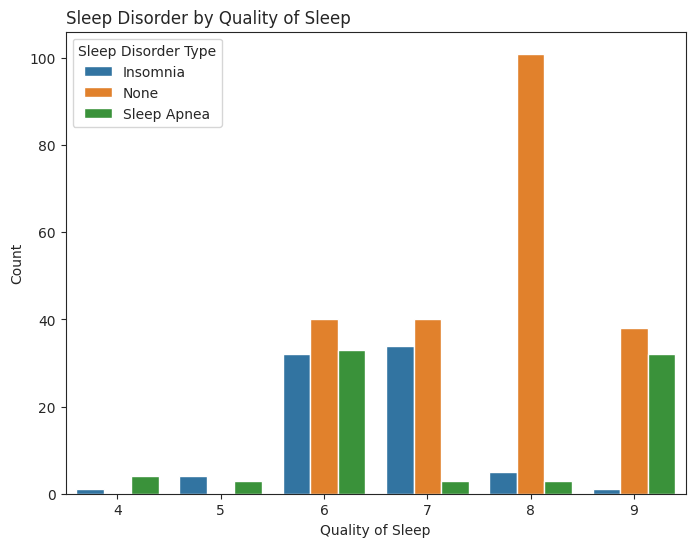

In [12]:
sleep_quality = df.groupby('Sleep Disorder')['Quality of Sleep'].value_counts()
sleep_quality = sleep_quality.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Quality of Sleep',
            y = 'count',
            hue = 'Sleep Disorder',
            data = sleep_quality,
            palette = color)
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.title('Sleep Disorder by Quality of Sleep', loc='left')
plt.legend(title='Sleep Disorder Type', loc='upper left')

plt.show()

* With level quality of sleep in **8**, data shows that **None** sleep disorder.
* With level quality of sleep **6 to 7**, data shows that chance of **Insomnia** sleep disorder and **6 and 9** shows that chance of **Sleep Apnea**.

**Sleep Disorder by Physical Activity Level**

---

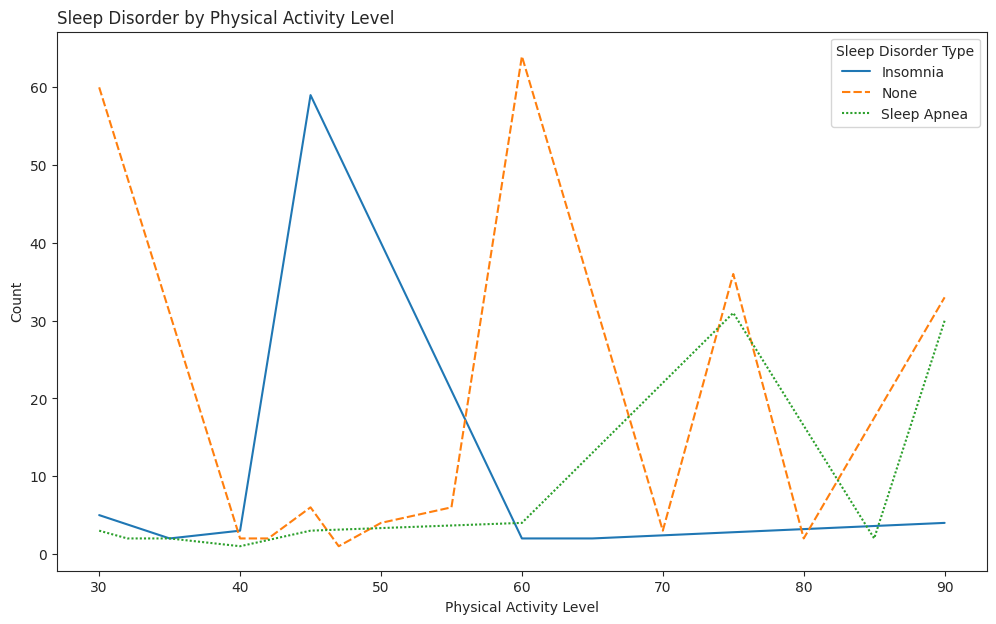

In [13]:
sleep_physical = df.groupby('Sleep Disorder')['Physical Activity Level'].value_counts()
sleep_physical = sleep_physical.reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x = 'Physical Activity Level',
             y = 'count',
             hue = 'Sleep Disorder',
             data = sleep_physical,
             palette = color,
             style = 'Sleep Disorder')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.title('Sleep Disorder by Physical Activity Level', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

* **Insomnia:** Mostly happen at **Physical Activity Level 45.**
* **None:** Highest at **Physical Activity Level 60.**
* **Sleep Apnea:** Shows at at **Physical Activity Levels 75 and 90.**

**Sleep Disorder by Sleep Duration**

---

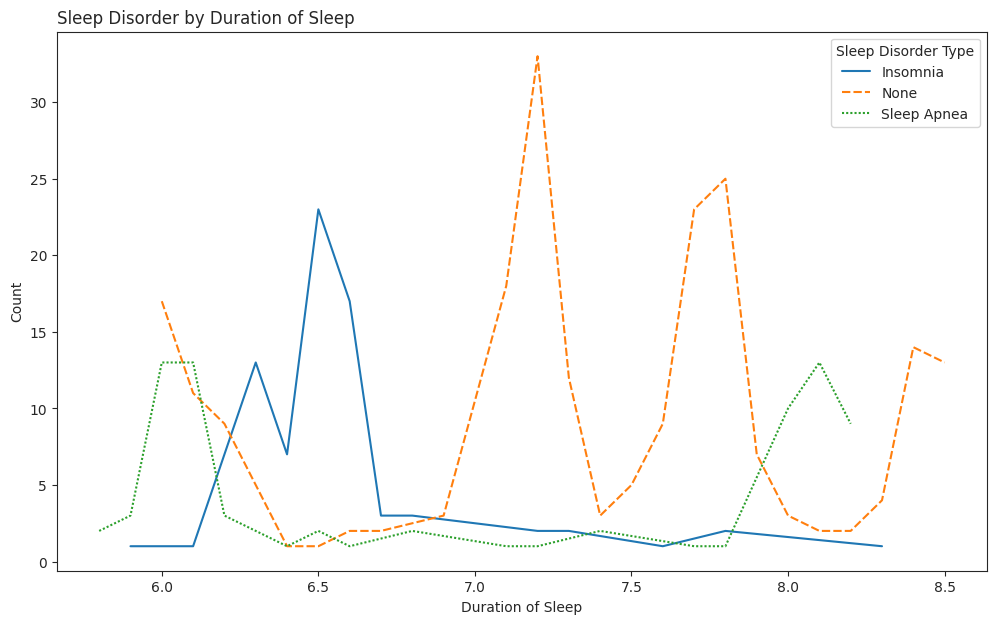

In [14]:
sleep_duration = df.groupby('Sleep Disorder')['Sleep Duration'].value_counts()
sleep_duration = sleep_duration.reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x = 'Sleep Duration',
             y = 'count',
             hue = 'Sleep Disorder',
             data = sleep_duration,
             palette = color,
             style = 'Sleep Disorder')

plt.xlabel('Duration of Sleep')
plt.ylabel('Count')
plt.title('Sleep Disorder by Duration of Sleep', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

* **Insomnia:** Most common sleep duration is around **6.4 to 6.6 hours.**
* **None:** Most higher chance sleep duration is around **7.2, 7.7, and 7.8 hours.**
* **Sleep Apnea:** Sleep durations around **6.0 to 6.2 hours.**

**Sleep Disorder by Stress Level**

---

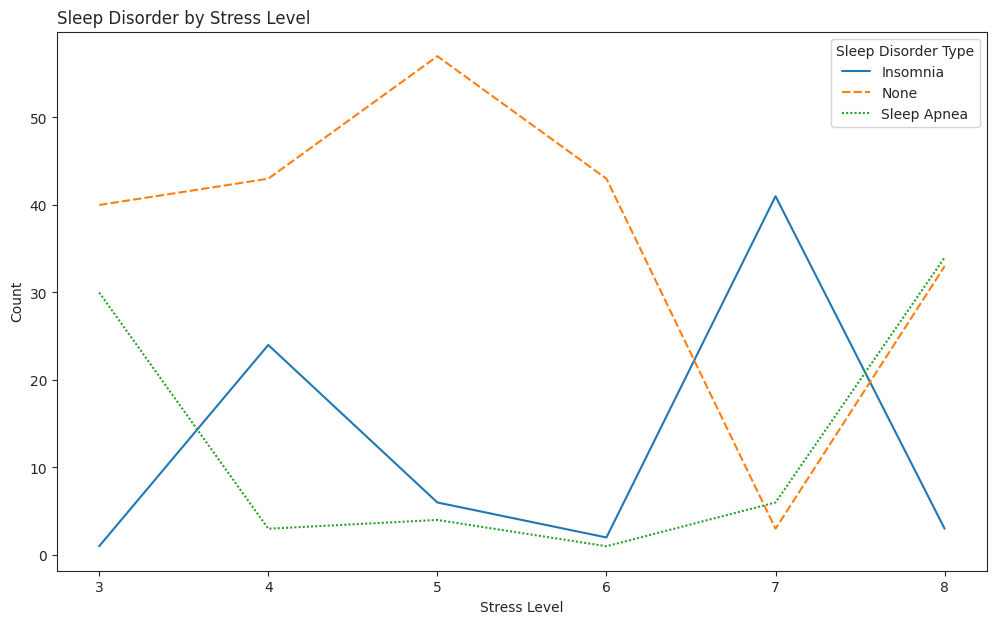

In [15]:
sleep_stress = df.groupby('Sleep Disorder')['Stress Level'].value_counts()
sleep_stress = sleep_stress.reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x = 'Stress Level',
             y = 'count',
             hue = 'Sleep Disorder',
             data = sleep_stress,
             palette = color,
             style = 'Sleep Disorder')

plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Sleep Disorder by Stress Level', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

* **Insomnia:** Most common stress level is around **4 and 7.**
* **None:** Most higher chance sleep duration is around **4 to 6.**
* **Sleep Apnea:** Sleep durations around **3 and 8.**

**Sleep Disorder by BMI Category**

---

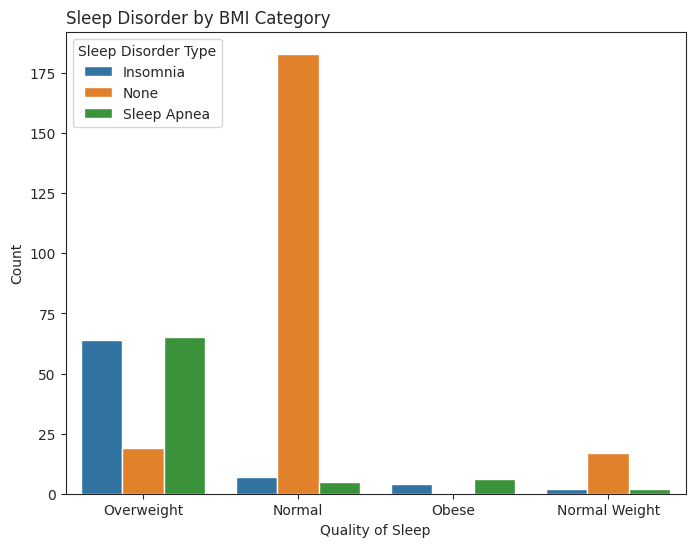

In [16]:
sleep_bmi = df.groupby('Sleep Disorder')['BMI Category'].value_counts()
sleep_bmi = sleep_bmi.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = 'BMI Category',
            y = 'count',
            hue = 'Sleep Disorder',
            data = sleep_bmi,
            palette = color)

plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.title('Sleep Disorder by BMI Category', loc='left')
plt.legend(title='Sleep Disorder Type', loc='upper left')

plt.show()

* **Normal BMI:** Mostly no sleep disorder.
* **Overweight:** More likely to have **Insomnia or Sleep Apnea.**

**Sleep Disorder by Blood Pressure**

---

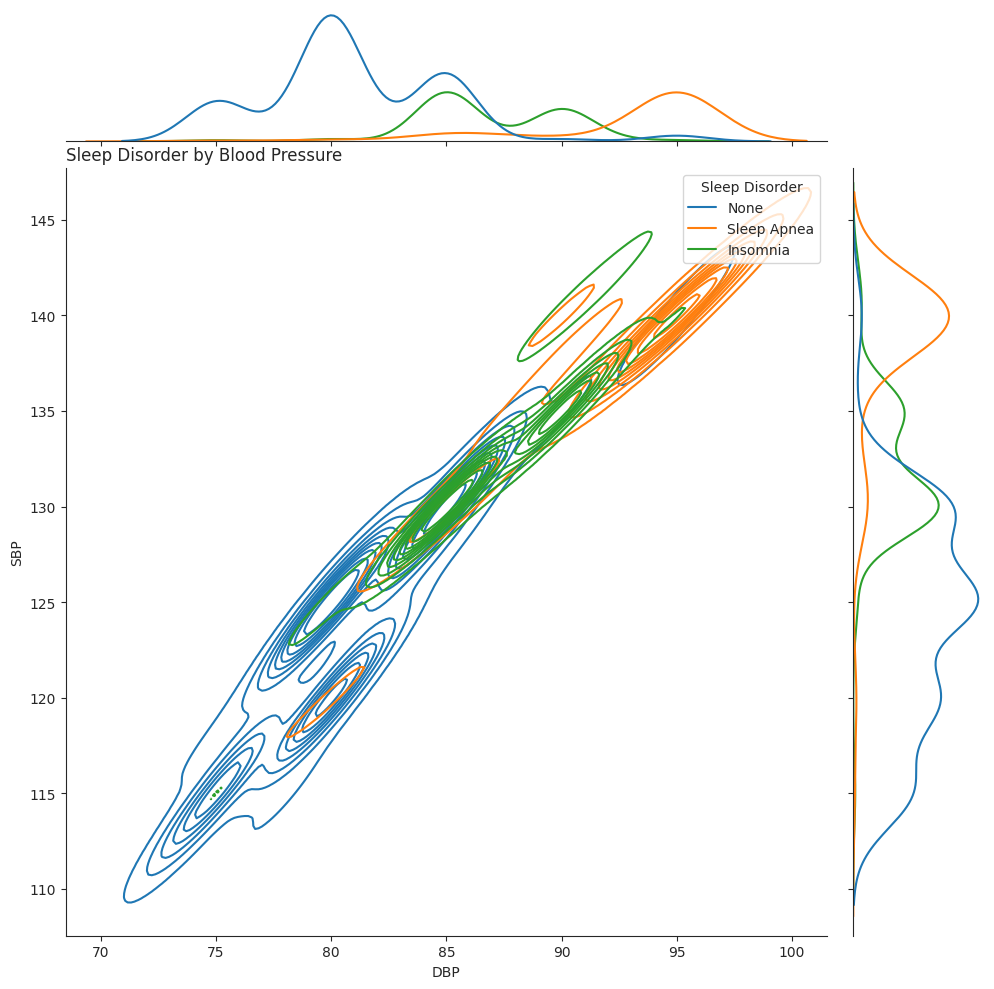

In [17]:
df[['SBP', 'DBP']] = df['Blood Pressure'].str.split('/', expand=True)
df[['SBP', 'DBP']] = df[['SBP','DBP']].astype(int)

sns.jointplot(data = df,
              x = 'DBP', 
              y = 'SBP', 
              hue ='Sleep Disorder',
              kind = 'kde',
              palette = color,
              height = 10,
              )
plt.title('Sleep Disorder by Blood Pressure', loc='left')
plt.show()

* **None** sleep disorder likely at **120/80 to 125/85 blood pressure.**
* **Insomnia** sleep disorder likely at **130/85 to 135/90 blood pressure.**
* **Sleep Apnea** sleep disorder likely at **140/95 blood pressure.**

In [18]:
# converting non-numeric data (String or Boolean) into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_corr = ['Age', 'Gender', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 
            'Daily Steps', 'SBP', 'DBP', 'Sleep Disorder']

df_cor = df.copy()

for x in col_corr:
    df_cor[x]=le.fit_transform(df_cor[x])

correlation_matrix = df_cor[col_corr].corr()
correlation_matrix

,Age,Gender,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SBP,DBP,Sleep Disorder
Age,1.000000,-0.582396,0.256096,0.356898,0.477546,0.155844,-0.435368,0.520658,-0.243457,-0.003409,0.574837,0.565827,0.200495
Gender,-0.582396,1.000000,-0.219113,-0.129468,-0.291366,0.002004,0.396018,-0.352060,0.200785,0.073201,-0.150911,-0.218484,-0.253415
Occupation,0.256096,-0.219113,1.000000,-0.312653,-0.278071,-0.079936,0.021123,0.699504,0.051072,-0.126290,0.538343,0.530950,-0.169800
Sleep Duration,0.356898,-0.129468,-0.312653,1.000000,0.879352,0.192503,-0.810712,-0.360772,-0.488306,0.072468,-0.179073,-0.159216,0.171440
Quality of Sleep,0.477546,-0.291366,-0.278071,0.879352,1.000000,0.199317,-0.898752,-0.312562,-0.643270,0.138857,-0.147665,-0.132712,0.179592
Physical Activity Level,0.155844,0.002004,-0.079936,0.192503,0.199317,1.000000,-0.058896,0.094688,0.128855,0.746560,0.213554,0.326295,0.398821
Stress Level,-0.435368,0.396018,0.021123,-0.810712,-0.898752,-0.058896,1.000000,0.163895,0.640600,0.052700,0.121641,0.107098,-0.036058
BMI Category,0.520658,-0.352060,0.699504,-0.360772,-0.312562,0.094688,0.163895,1.000000,0.283795,-0.093976,0.703253,0.739744,0.016573
Heart Rate,-0.243457,0.200785,0.051072,-0.488306,-0.643270,0.128855,0.640600,0.283795,1.000000,-0.203414,0.293687,0.289195,0.214685
Daily Steps,-0.003409,0.073201,-0.126290,0.072468,0.138857,0.746560,0.052700,-0.093976,-0.203414,1.000000,-0.030930,0.091245,0.232649


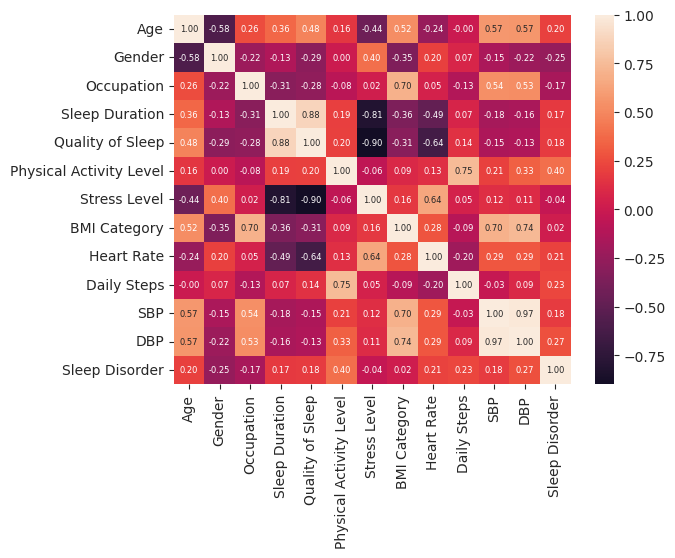

In [19]:
sns.heatmap(data = correlation_matrix,
            cmap = grad,
            annot = True, 
            fmt = ".2f",
            annot_kws = {'size': 6},
            center = 0)
plt.show()

In [20]:
df.to_csv('sleep_df.csv', index=False)